# Binary Decision Diagram

In [149]:
from dd import cudd
from PIL import Image

In [159]:
bdd = cudd.BDD()
bdd.configure(reordering=False)
bdd.declare('x1', 'x2', 'x3', 'x4', 'x5')

x1 = bdd.var('x1')
x2 = bdd.var('x2')
x3 = bdd.var('x3')
x4 = bdd.var('x4')
x5 = bdd.var('x5')

In [171]:
not_ordered = x1 & x3 | x2 & x5 | x4

In [172]:
bdd.to_expr(not_ordered)

'ite(x1, ite(x2, ite(x3, TRUE, ite(x4, TRUE, x5)), ite(x3, TRUE, x4)), ite(x2, ite(x4, TRUE, x5), x4))'

In [173]:
bdd.dump('bdd-dd-not_ordered.png', roots=[not_ordered])

In [ ]:
Image.open('bdd-dd-not_ordered.png', mode='r')

# Using Sifting 

In [115]:
cudd.reorder(bdd)

In [116]:
bdd.to_expr(not_ordered)

'ite(x5, ite(x2, TRUE, ite(x4, TRUE, ite(x1, x3, FALSE))), ite(x4, TRUE, ite(x1, x3, FALSE)))'

In [117]:
bdd.dump('bdd-dd-ordered.png', roots=[not_ordered])

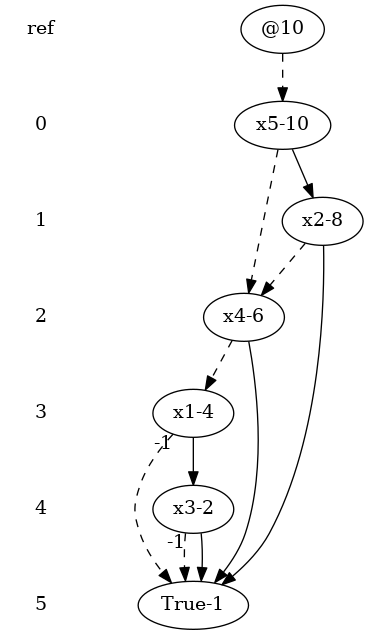

In [118]:
Image.open('bdd-dd-ordered.png', mode='r')

# Fixed Order

In [138]:
desired_levels = dict(
    x1=1,
    x2=3,
    x3=2,
    x4=0,
    x5=4
)

In [139]:
cudd.reorder(bdd, desired_levels)

In [140]:
bdd.to_expr(not_ordered)

'ite(x4, TRUE, ite(x1, ite(x3, TRUE, ite(x2, x5, FALSE)), ite(x2, x5, FALSE)))'

In [141]:
bdd.dump('bdd-dd-custom_ordered.png', roots=[not_ordered])

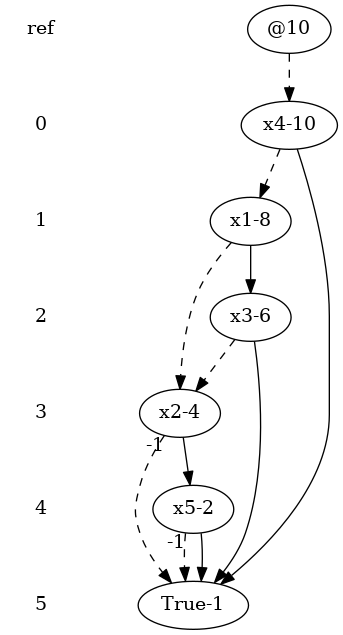

In [142]:
Image.open('bdd-dd-custom_ordered.png', mode='r')

# Evaluate Cases

In [55]:
case_1 = x1 & ~x2 & x3 & ~x4 & ~x5

In [59]:
(case_1 & not_ordered) == bdd.false

False

In [60]:
case_1_bdd = case_1 & not_ordered

In [61]:
bdd.to_expr(case_1_bdd)

'(~ ite(x3, ite(x1, ite(x4, TRUE, ite(x2, TRUE, x5)), TRUE), TRUE))'

In [62]:
bdd.dump('bdd-dd-case_1.png', roots=[case_1_bdd])

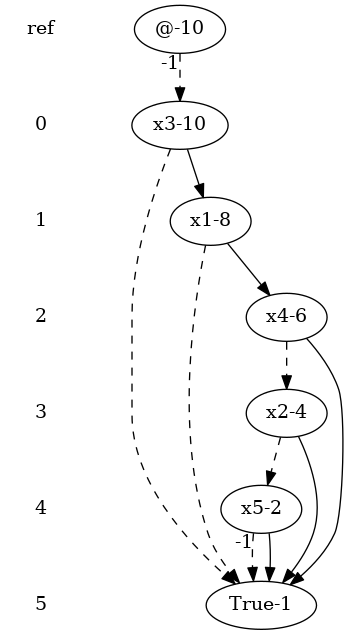

In [63]:
Image.open('bdd-dd-case_1.png', mode='r')

In [68]:
case_6 = x1 & x2 & ~x3 & ~x4 & x5

In [69]:
(case_6 & not_ordered) == bdd.false

False